<a href="https://colab.research.google.com/github/lailanajjar/datasciencefundamental/blob/main/Copy_of_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Sales Prediction For Food Items Sold At Various Stores***#
- Laila Najjar


###Project overview###
This project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

# ***Loading Data***

#***Imports***



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#***Loading Data***

In [7]:
path="/content/drive/MyDrive/01-Fundamentals/Week02/Data/sales_predictions_2023 (1).csv"
df=pd.read_csv(path)


In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#***Data Cleaning***
- How many rows/columns:

In [10]:
df.shape

(8523, 12)

*   There are 8523 rows and 12 columns




-Checking the data types:

In [11]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


The Outlet_Establishment_Year column is showing as an integer type column and it should be object type column.
All other data types are as they should be.

In [12]:
df=df.astype({'Outlet_Establishment_Year':'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


#***Duplicated Data***
- Checking for duplicated data:

In [13]:
df.duplicated().sum()

0

#***Missing Values***
-Checking for missing values:

In [14]:
df_null=df.isna().sum()
df_null

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [15]:
df.isna().sum() / len(df) * 100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


Missing Values:

-There are 1463 missing values in the Item_Weight column. (17.16%).

-There are 2410 missing values in the Outlet_Size column. (28.27%).

<Axes: >

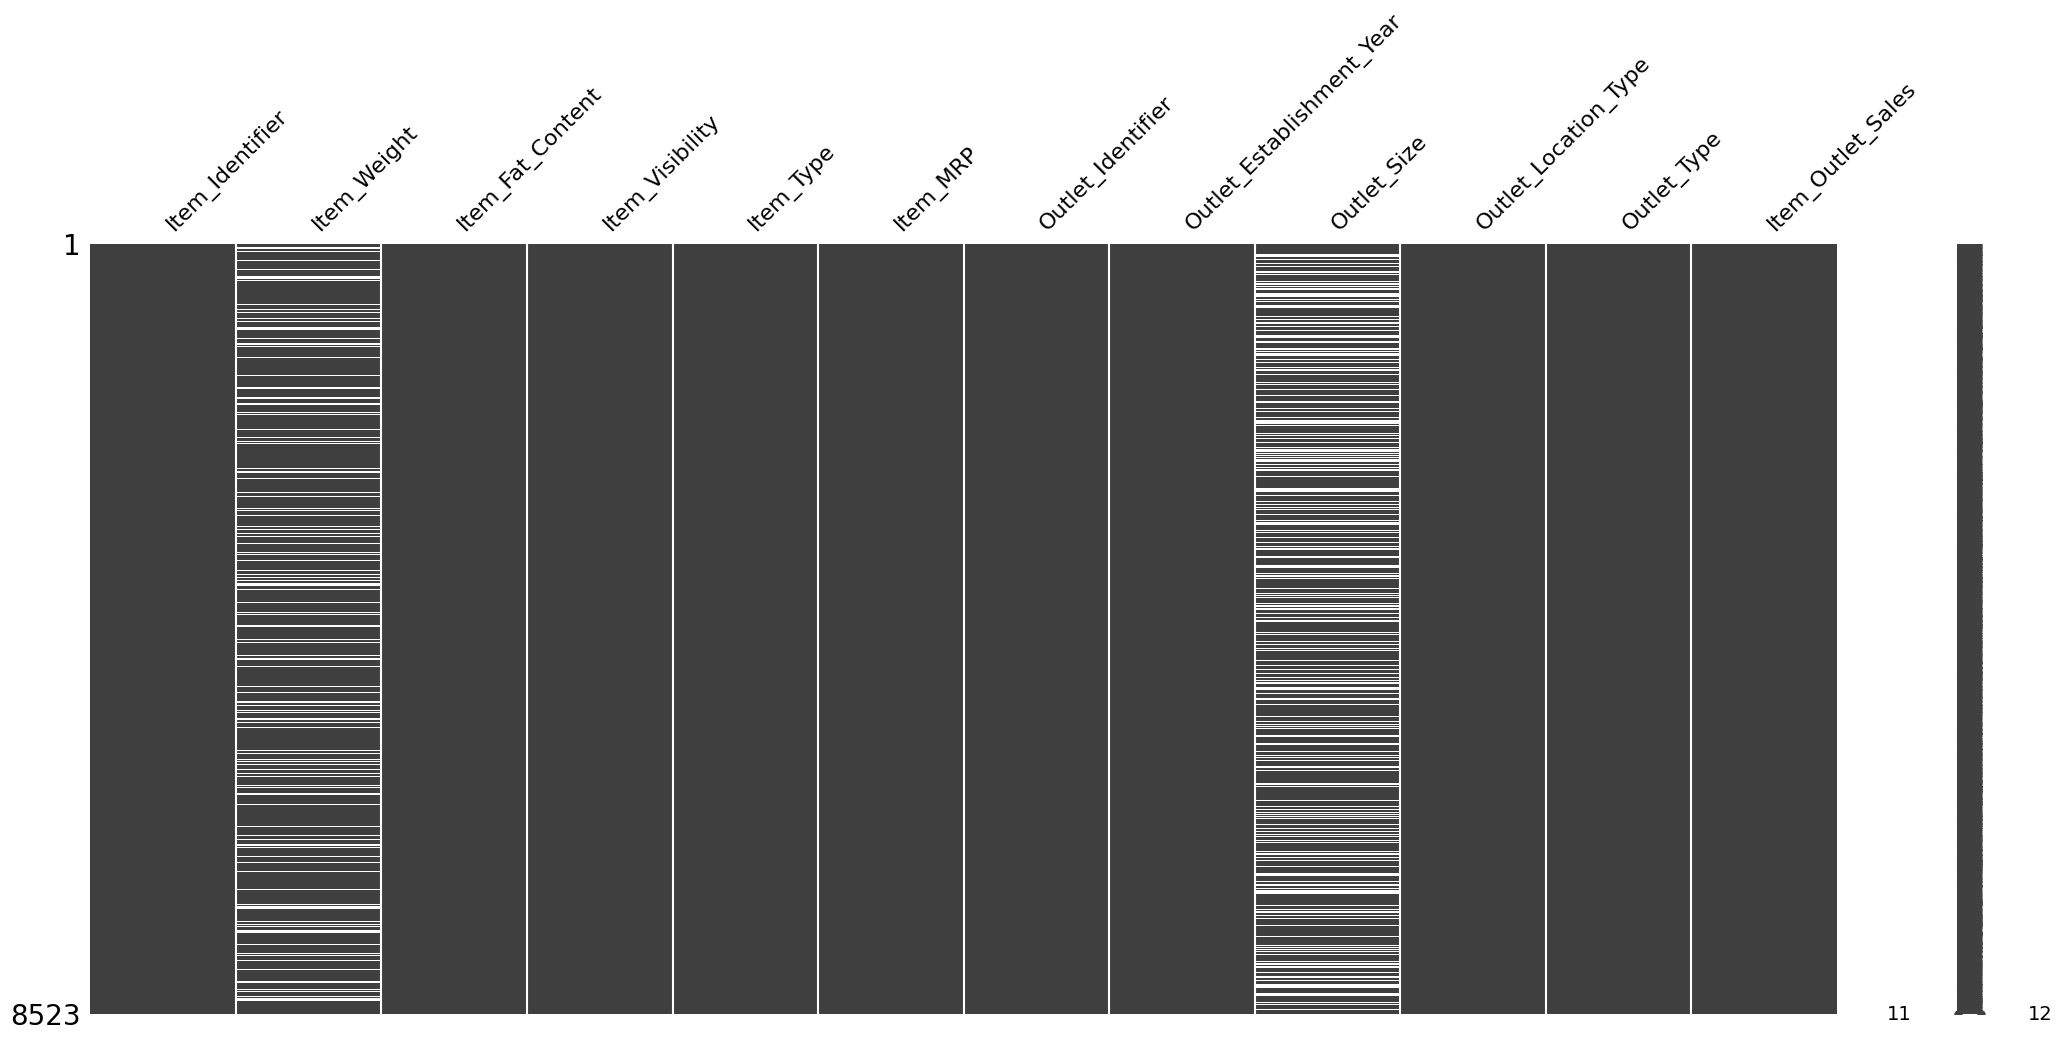

In [16]:
import missingno as msno
msno.matrix(df)

In [17]:
null_Item_Weight=df["Item_Weight"].isna()
df[null_Item_Weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [19]:
df["Outlet_Size"].fillna("Missing",inplace=True)
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [20]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [21]:
string_cols=df.select_dtypes(include="object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [22]:
cat_cols=df.select_dtypes(exclude="object").columns
cat_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [23]:
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [24]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


###porject 1 - part 3##


For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.
Please feel free to add more than the minimum. Remember this is your chance to display your skills!

###Exploratory Visuals & Analysis###


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [72]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Visualaization By Histogram###

In [76]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [95]:
df["Item_Fat_Content"].value_counts()
df["Item_Type"].value_counts()
df["Outlet_Size"].value_counts()
df["Outlet_Location_Type"].value_counts()
df["Outlet_Type"].value_counts()
df["Outlet_Establishment_Year"]
print(df["Outlet_Establishment_Year"].value_counts())
print(df["Item_Fat_Content"].value_counts())
print(df["Item_Type"].value_counts())
print(df["Outlet_Size"].value_counts())
print(df["Outlet_Location_Type"].value_counts())
print(df["Outlet_Type"].value_counts())

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery 

Text(0, 0.5, 'Count')

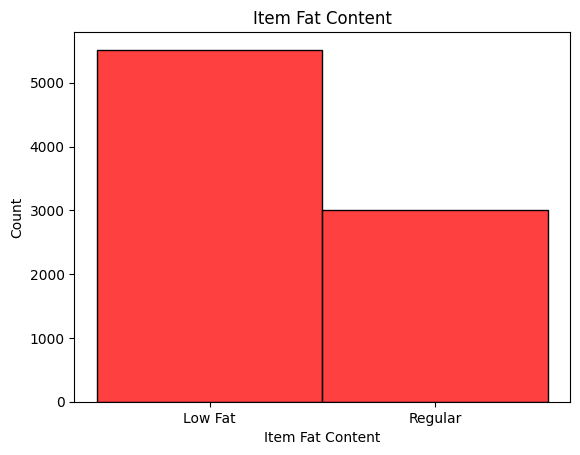

In [78]:
ax=sns.histplot(data=df,x="Item_Fat_Content",color="red")
ax.set_title("Item Fat Content")
ax.set_xlabel("Item Fat Content")
ax.set_ylabel("Count")

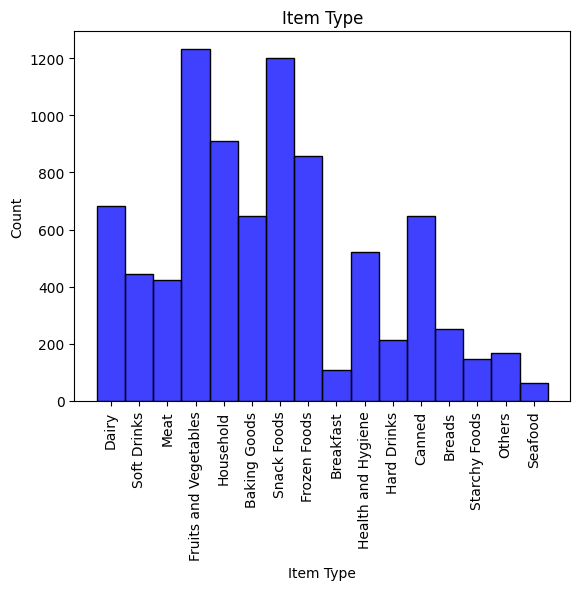

In [83]:
ax=sns.histplot(data=df,x="Item_Type",color="blue")
ax.set_title("Item Type")
ax.set_xlabel("Item Type")
ax.set_ylabel("Count")
ax.tick_params(axis="x",rotation=90)
plt.show()

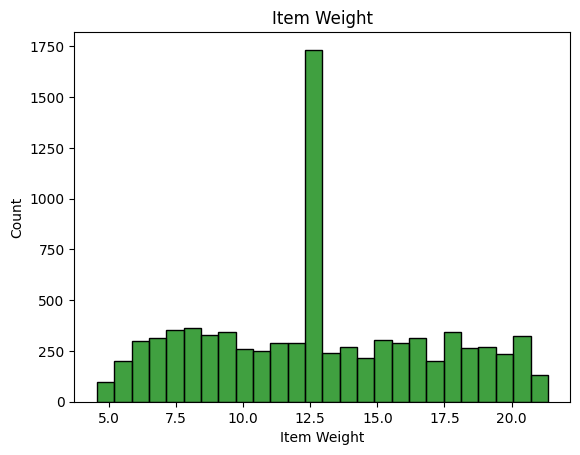

In [84]:
ax=sns.histplot(data=df,x="Item_Weight",color="green")
ax.set_title("Item Weight")
ax.set_xlabel("Item Weight")
ax.set_ylabel("Count")
plt.show()

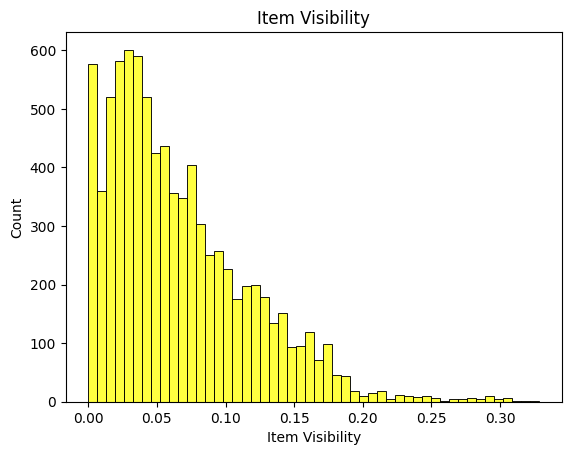

In [85]:
ax=sns.histplot(data=df,x="Item_Visibility",color="yellow")
ax.set_title("Item Visibility")
ax.set_xlabel("Item Visibility")
ax.set_ylabel("Count")
plt.show()

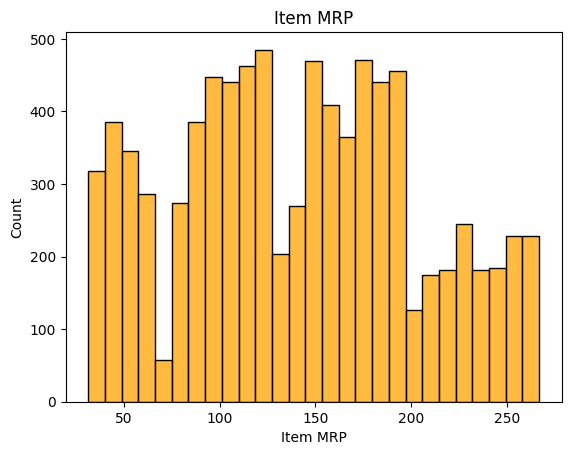

In [86]:
ax=sns.histplot(data=df,x="Item_MRP",color="orange")
ax.set_title("Item MRP")
ax.set_xlabel("Item MRP")
ax.set_ylabel("Count")
plt.show()

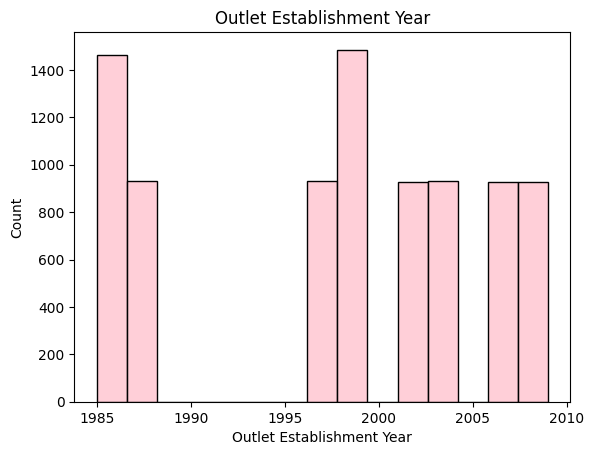

In [87]:
ax=sns.histplot(data=df,x="Outlet_Establishment_Year",color="pink")
ax.set_title("Outlet Establishment Year")
ax.set_xlabel("Outlet Establishment Year")
ax.set_ylabel("Count")
plt.show()

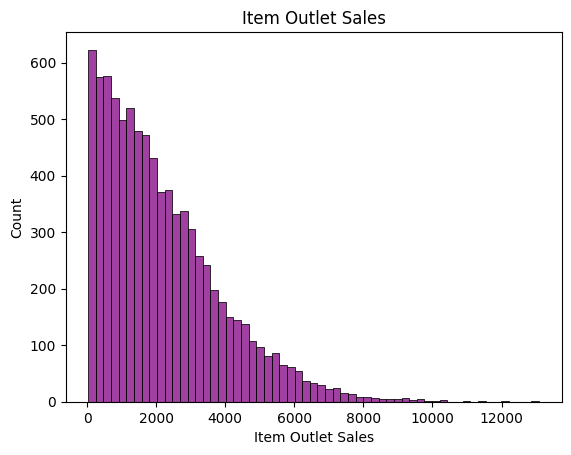

In [88]:
ax=sns.histplot(data=df,x="Item_Outlet_Sales",color="purple")
ax.set_title("Item Outlet Sales")
ax.set_xlabel("Item Outlet Sales")
ax.set_ylabel("Count")
plt.show()

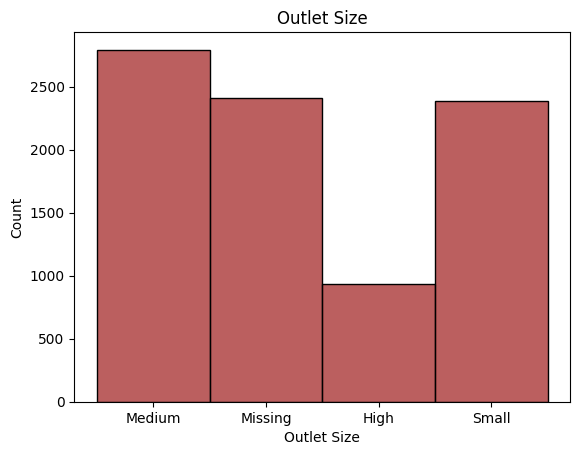

In [90]:
ax=sns.histplot(data=df,x="Outlet_Size",color="brown")
ax.set_title("Outlet Size")
ax.set_xlabel("Outlet Size")
ax.set_ylabel("Count");

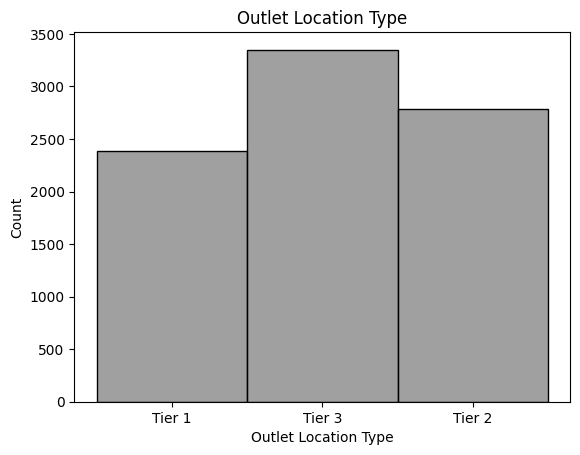

In [91]:
ax=sns.histplot(data=df,x="Outlet_Location_Type",color="grey")
ax.set_title("Outlet Location Type")
ax.set_xlabel("Outlet Location Type")
ax.set_ylabel("Count");

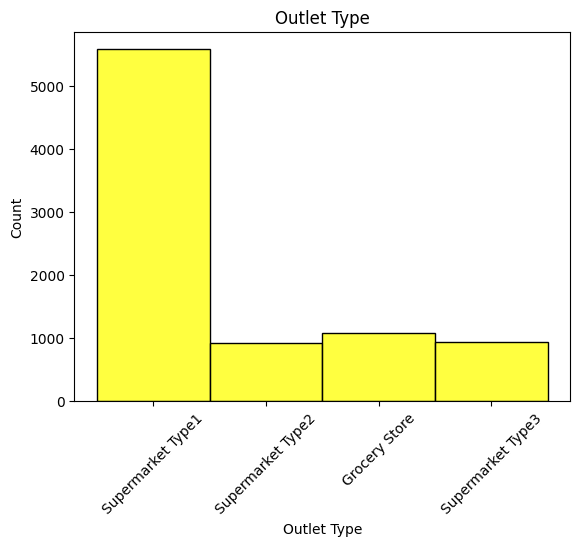

In [48]:
ax=sns.histplot(data=df,x="Outlet_Type",color="yellow")
ax.set_title("Outlet Type")
ax.set_xlabel("Outlet Type")
ax.set_ylabel("Count")
ax.tick_params(axis="x",rotation=45)
plt.show()


###Visualization By Boxplot###

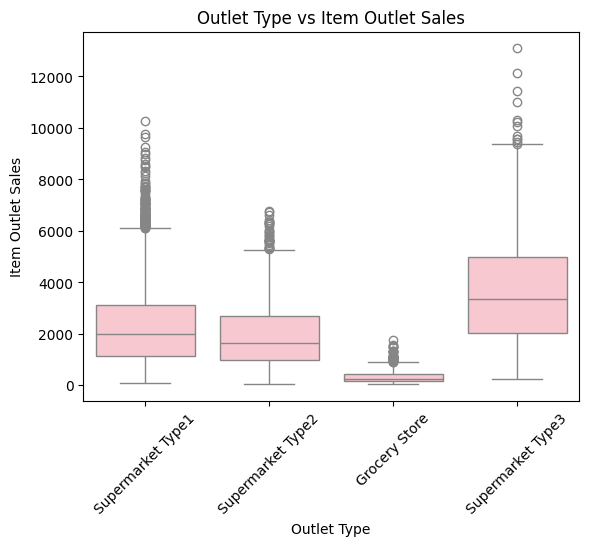

In [58]:
ax = sns.boxplot(data=df, y="Item_Outlet_Sales", x="Outlet_Type",color="pink")
ax.set_title("Outlet Type vs Item Outlet Sales")
ax.set_xlabel("Outlet Type")
ax.set_ylabel("Item Outlet Sales")
ax.tick_params(axis="x",rotation=45)
plt.show();


###Visualization By Countplot###

<ipython-input-66-032c39ad24a1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


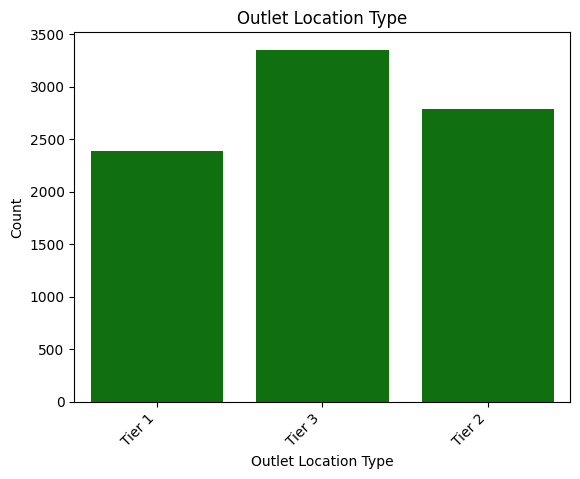

In [66]:
ax=sns.countplot(data=df,x="Outlet_Location_Type",color="green")
ax.set_title("Outlet Location Type")
ax.set_xlabel("Outlet Location Type")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

###Visualization By Heatmap###

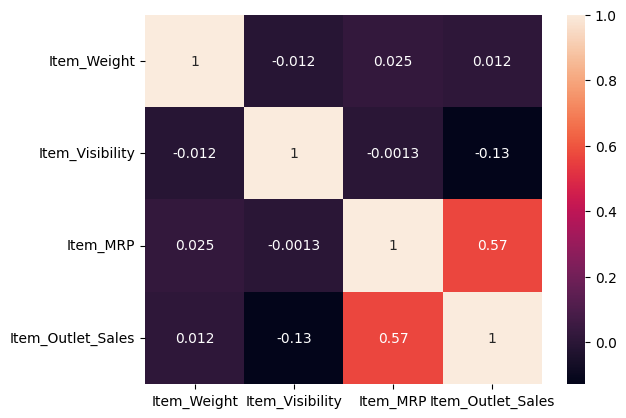

In [75]:
corr=df.corr(numeric_only=True)
corr.round(2)
sns.heatmap(corr,annot=True)
plt.show();